## PMIM402 Clustering - Suzannah Downie (2131572)


<H2>Introduction</H2>


This notebook will answer within it the questions posed as part of the PMIM402 clustering assessment task. This will enable users to view code and output alongside further information about the process, which should provide a degree of contextual background that will aid users' comprehension of the larger task at hand. Specifically, the questions posed are the following:

<H3>K-Means</H3>

**1.	Why should the attribute “class” in heart-c.csv (“num”) not be included for clustering?**  
**2.	Run the K-means algorithm and provide reasoning for the optimum value of K.**  
**3.	Which features would you expect to be less useful when using K-means and why?**

<H3>Hierarchical Clustering</H3>

**1. Show the clustering results in a tree structure and provide reasoning for the optimal number 
of clusters.**  
**2. Describe the link method you used.**  
**3. What are the strengths and limitations of this link method in hierarchical clustering?**  

These questions will be answered at appropriate points during this notebook. This may mean that they are not necessarily answered in the order specified above, but this is to ensure that they are answered in the context of both code and output that will help to demonstrate the responses in practical terms.

<H2>Data Preparation and Pre-Processing</H2>

The first thing that we need to do is to load in the libraries that we will need for the rest of the notebook. In addition to this, we will also make some tweaks to make our plots more legibile.

In [50]:
# Necessary libraries
library(tidyverse)
library(factoextra)
library(dendextend)
library(cluster)
library(clValid)

# Make plots more appropriately sized
options(repr.plot.width=15, repr.plot.height=8)


In [60]:
# Read in the heart dataset and remove the index column and pipe to data frame.
heart <- read.csv("heart-c.csv")[-1] %>% as.data.frame 

# Create a vector of more meaningful feature names, to enable better comprehension of results.
feature_names = c('age', 'sex', 'chest pain type','resting blood pressure', 'cholesterol','fasting blood sugar',
    'resting ecg', 'max heart rate', 'exercise angina','relative st depression', 'peak st slope', 
    'fluoroscopy result','thallium test result', 'class')

colnames(heart) <- feature_names

In [56]:
# Check for null values.
colSums(is.na(heart))

age                    sex        chest pain type 
                     0                      0                      0 
resting blood pressure            cholesterol    fasting blood sugar 
                     0                      0                      0 
           resting ecg         max heart rate        exercise angina 
                     0                      0                      0 
relative st depression          peak st slope     fluoroscopy result 
                     0                      0                      5 
  thallium test result                  class 
                     2                      0

We can see above the number of NA values that exist within our data set, and the feature columns within which these occur. The columns $fluoroscopy$ $result$ and $thallium$ $test$ $result$ contain missing values but other than this we have a relatively complete data set. In addition to this, we should also note the final column, $class$. With this in mind, we might consider the following question:

**1.	Why should the attribute “class” in heart-c.csv (“num”) not be included for clustering?** 
  
We are using an _unsupervised_ algorithm when we use K-Means. This means that the algorithm that does not need any labelled data in order to be effective. With this in mind, we want for the algorithm to make predictions (generate clusters) without access to any labelled data. As “class” is effectively an output we might wish to predict, it is wise not to include this in our model as we want it to be able to predict based on patterns in the the data and not the label itself. In a real-world use-case of K-Means, we would not necessarily have access to a label such as this. Because of this, we will remove this from the data. However, we will also retain a version of our heart data frame that contains this, as we might perhaps be able to verify the efficacy of our K-Means model by comparing the cluster predictions for each observation of the data to the class labels within the original data set. This is also known as the $ground$ $truth$.


In [65]:
# Create two data frames - one for K-Means with class removed: 
heart_km <- heart %>% select(-class)

# and one for the ground truth:
heart_gt <- heart

# View heart data frame so as we can orient ourselves with the dataset at hand.
head(heart_km)

,age,sex,chest pain type,resting blood pressure,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,relative st depression,peak st slope,fluoroscopy result,thallium test result
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<chr>
1,63,male,typ_angina,145,233,t,left_vent_hyper,150,no,2.3,down,0,fixed_defect
2,67,male,asympt,160,286,f,left_vent_hyper,108,yes,1.5,flat,3,normal
3,67,male,asympt,120,229,f,left_vent_hyper,129,yes,2.6,flat,2,reversable_defect
4,37,male,non_anginal,130,250,f,normal,187,no,3.5,down,0,normal
5,41,female,atyp_angina,130,204,f,left_vent_hyper,172,no,1.4,up,0,normal
6,56,male,atyp_angina,120,236,f,normal,178,no,0.8,up,0,normal


As we can see above, our data contains a combination of data types:

- Nominal data: $sex$, $chest$ $pain$ $type$, $fasting$ $blood$ $sugar$, $resting$ $ecg$, $exercise$ $angina$, 

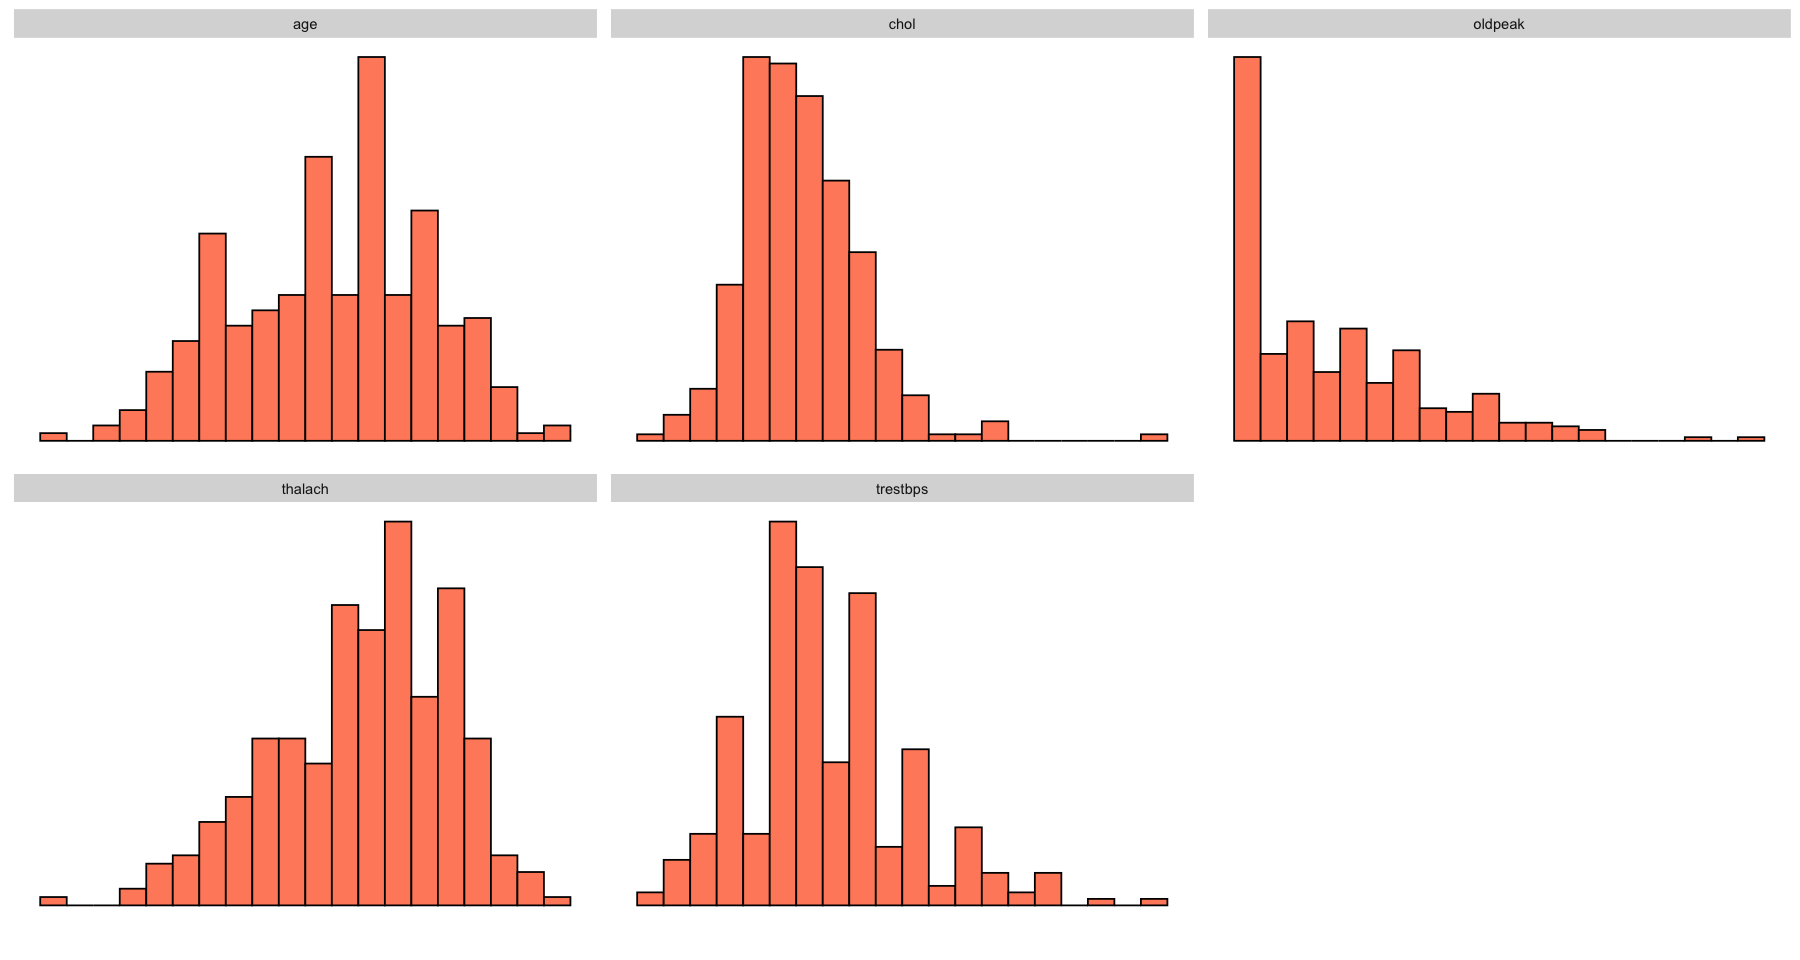

In [28]:
hist_all <- heart %>% gather(attribute, value, 1:ncol(heart)) %>%
  ggplot(aes(x = value)) + 
  geom_histogram(fill = "salmon1", color = "black", bins = 20) +
  facet_wrap(~attribute, scales = 'free') +
  theme_dendro()

hist_all

In [8]:
heart_norm <- scale(heart) %>% as.data.frame

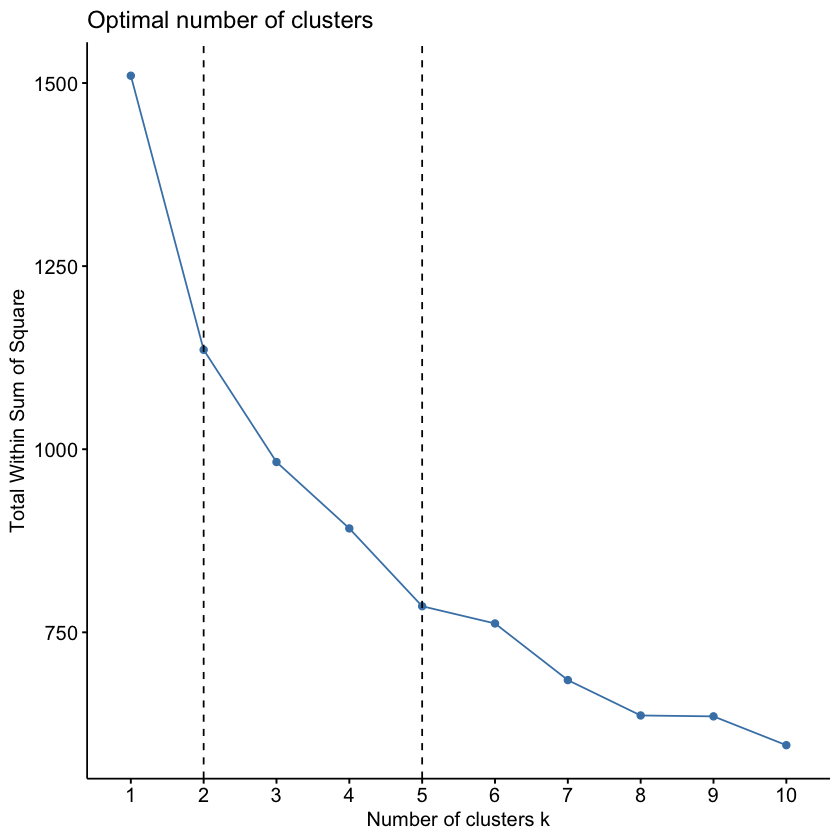

In [9]:
fviz_nbclust(x = heart_norm, FUNcluster = kmeans, method = "wss") +
  geom_vline(xintercept = 2, linetype = 2) +
  geom_vline(xintercept = 5, linetype = 2)

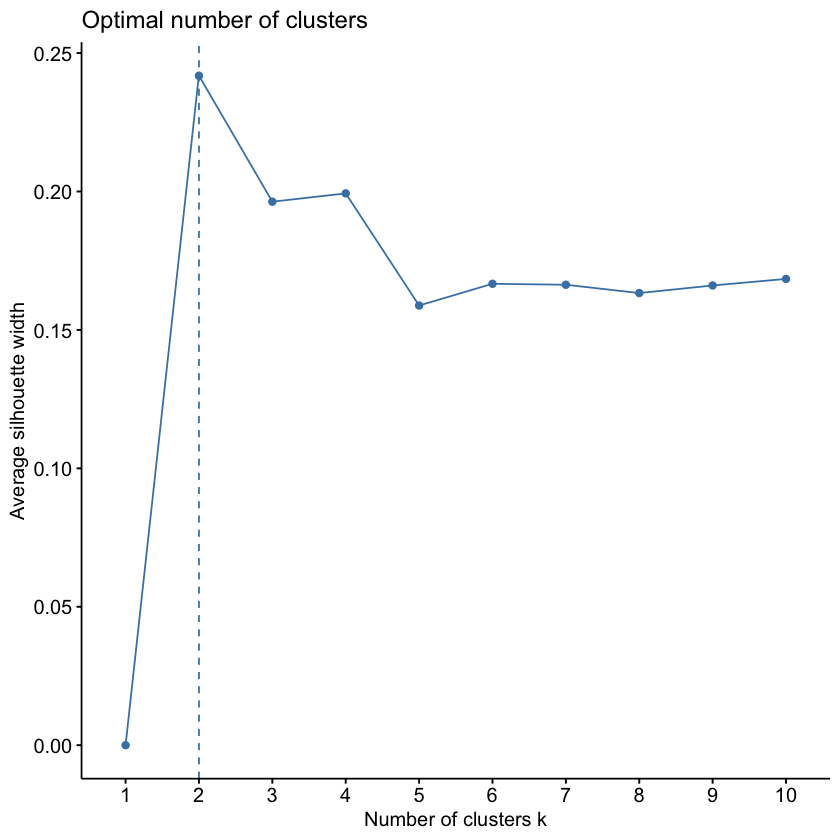

In [10]:
fviz_nbclust(x = heart_norm, FUNcluster = kmeans, method = 'silhouette')

In [ ]:
kmeans_2 <- kmeans(heart_norm, centers = 2)
kmeans_5 <- kmeans(heart_norm, centers = 5)

In [ ]:
fviz_cluster(kmeans_2, geom = "point", pointsize = 2, 
             data = heart_norm, 
             main = 'Cluster Plot in 2D Space - 2 Clusters', 
             xlab = 'Dimension 1', ylab = 'Dimension 2')

In [ ]:
fviz_cluster(kmeans_5, geom = "point", pointsize = 2, data = heart_norm, main = 'Cluster Plot in 2D Space - 5 Clusters', 
             xlab = 'Dimension 1', ylab = 'Dimension 2')
